# Ejercicio 13

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

# Modelos Lineales

Los modelos lineales tienen grandes ventajas: son fáciles de implementar e interpretar.
Esto los convierte en una base conceptual importante que es necesario revisar antes de pasar a métodos 
más complejos.

En un modelo lineal la respuesta, o target, $Y$ se modela como una combinación lineal de variables $X_1, \ldots, X_p$:

$$
Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p
$$

En este notebook vamos a utilizar `scikit-learn` para ajustar diferentes modelos lineales a un conjunto de datos.


Primero importamos el submódulo necesario

In [3]:
import sklearn.linear_model

sklearn.linear_model tiene una gran variedad de objetos que implementan diferentes tipos de modelos lineales.
La lista completa se pueden encontrar en http://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model

En este notebook vamos a empezar con el modelo más sencillo de todos: la regresión lineal por mínimos cuadrados.

## Precios de Carros en Estados Unidos en 1993

Para hacer la discusión más concreta vamos a cargar datos sobre precios y características de carros en Estados Unidos 
en el año 1993. Los datos que se encuentran en este repositorio son una copia tomada de https://vincentarelbundock.github.io/Rdatasets/doc/MASS/Cars93.html

En esa página se encuentra la descripción de cada una de las variables.
Por ahora vamos a cargar el archivo usando pandas

In [6]:
data = pd.read_csv('Cars93.csv')

El número total de entradas es

In [7]:
len(data)

93

El número de columnas es

In [8]:
len(data.keys())

28

Los nombres de las columnas son

In [9]:
data.keys()

Index(['Unnamed: 0', 'Manufacturer', 'Model', 'Type', 'Min.Price', 'Price',
       'Max.Price', 'MPG.city', 'MPG.highway', 'AirBags', 'DriveTrain',
       'Cylinders', 'EngineSize', 'Horsepower', 'RPM', 'Rev.per.mile',
       'Man.trans.avail', 'Fuel.tank.capacity', 'Passengers', 'Length',
       'Wheelbase', 'Width', 'Turn.circle', 'Rear.seat.room', 'Luggage.room',
       'Weight', 'Origin', 'Make'],
      dtype='object')

Una visión rápida de los primeros 10 elementos

In [10]:
data[:10]

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
5,6,Buick,Century,Midsize,14.2,15.7,17.3,22,31,Driver only,...,6,189,105,69,41,28.0,16.0,2880,USA,Buick Century
6,7,Buick,LeSabre,Large,19.9,20.8,21.7,19,28,Driver only,...,6,200,111,74,42,30.5,17.0,3470,USA,Buick LeSabre
7,8,Buick,Roadmaster,Large,22.6,23.7,24.9,16,25,Driver only,...,6,216,116,78,45,30.5,21.0,4105,USA,Buick Roadmaster
8,9,Buick,Riviera,Midsize,26.3,26.3,26.3,19,27,Driver only,...,5,198,108,73,41,26.5,14.0,3495,USA,Buick Riviera
9,10,Cadillac,DeVille,Large,33.0,34.7,36.3,16,25,Driver only,...,6,206,114,73,43,35.0,18.0,3620,USA,Cadillac DeVille


Como respuesta vamos a utilizar `Price` y como variables `Turn.circle`, `Horsepower` y  `MPG.Highway`
Vamos a recortar entonces las columnas a esas variables 

In [12]:
subset_data = data[['Price', 'Horsepower', 'MPG.highway', 'Turn.circle']]
subset_data

,Price,Horsepower,MPG.highway,Turn.circle
0,15.9,140,31,37
1,33.9,200,25,38
2,29.1,172,26,37
3,37.7,172,26,37
4,30.0,208,30,39
5,15.7,110,31,41
6,20.8,170,28,42
7,23.7,180,25,45
8,26.3,170,27,41
9,34.7,200,25,43


Para empezar vamos a graficar las propiedades de `subset_data`

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


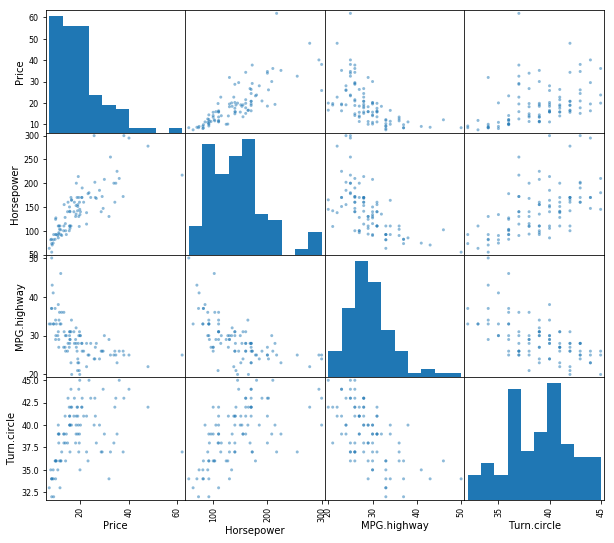

In [20]:
from pandas.tools import plotting

_ = plotting.scatter_matrix(subset_data, figsize=(10,9))

La primera fila de la figura anterior nos muestra que en efecto hay correlaciones entre `Price` y las variables de interés.
Lo que vamos a hacer para empezar es encontrar los mejores parámetros para el modelo `Price` = $\beta_0$ + $\beta_1 \times $`Horsepower`.

Para esto vamos a inicializar la clase `sklearn.linear_model.LinearRegression`